In [0]:
!pip install kaggle

In [0]:
!pip install pandas==1.0.0

     |████████████████████████████████| 10.1MB 3.2MB/s 
  Found existing installation: pandas 0.23.0
    Uninstalling pandas-0.23.0:
      Successfully uninstalled pandas-0.23.0


# Module importing

In [0]:
import pandas as pd
import numpy as np

In [4]:
pd.__version__

'1.0.3'

In [0]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors
from multiprocessing import Pool

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [0]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.preprocessing import scale

In [0]:
import tqdm

In [0]:
import re

In [0]:
from bs4 import BeautifulSoup

# Data loading

In [177]:
import os
os.environ['KAGGLE_USERNAME'] = "kryvokhyzha" # username from the json file
os.environ['KAGGLE_KEY'] = "b30f0451d14f9a4f8a939d2fbadf03e8" # key from the json file
!kaggle competitions download -c company-acceptance-prediction # api copied from kaggle

  0% 0.00/167k [00:00<?, ?B/s]
100% 167k/167k [00:00<00:00, 65.8MB/s]
 72% 59.0M/82.3M [00:00<00:00, 56.1MB/s]
100% 82.3M/82.3M [00:00<00:00, 99.6MB/s]
 93% 168M/180M [00:02<00:00, 88.0MB/s]
100% 180M/180M [00:02<00:00, 81.5MB/s]


# Data serialization

In [0]:
train_df = pd.read_pickle('train_df.pkl.zip')

In [0]:
test_df = pd.read_pickle('test_df.pkl.zip')

In [0]:
test_df.head(5)

,id,html,text,keywords,accepted_function,rejected_function,accepted_product,rejected_product
0,071c2e15-5fd0-4e7d-b78d-26b7c34491e1,"[b'<!DOCTYPE html>\r\n<html id=""ctl00_htmlMast...",[We use cookies to tailor our service and ensu...,"[technologies, descriptive, mapping, learning,...","IT support, IT managed services, IT integratio...","manufacture, production, processing, distribut...",,
1,e534df73-b385-4a12-8368-38992d3af7d3,"[b'\n<!DOCTYPE html>\n\n<html lang=""en-US"">\n\...",[About us\nAbout Powernet\nPartnerships\nCusto...,"[outsourcing, projects, IT, sensors, convergen...","software development, database development, sy...","wholesale, distribution, retail selling, manuf...",,
2,4e38c9ff-bffe-4251-b2b2-94777c7344fe,[b'<!--\n.----------------. .----------------...,[Work\nApproach\nPeople\nValues\nBlog\nCareers...,"[Inventing, products, risk, development, servi...","general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",,
3,a7f8870c-30f8-4851-8f8b-4c16942b397f,[b'<!DOCTYPE html>\n<!--[if lt IE 7]><html cla...,[Menu\nMenu\nSupport\nInfrastructure\nColocati...,"[low, chain, portfolio, services, Procurement,...","Investment research and information services, ...","Construction, production and supply, Advertisi...",,
4,c062f411-ae3e-486a-9cba-2267889adb2b,"[b'<!DOCTYPE html><html lang=""en-US""><head><me...",[Français (French)\nEnglish (English)\n日本語 (Ja...,"[recruitment, producing, Evaluation, Payroll, ...","general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",,


# Data preprocessing

## Dropping byte-like parts

In [0]:
# :(

## Extract comments

In [0]:
# :(

## Extract meta information

In [0]:
train_df['Title'] = np.nan
train_df['Keyword'] = np.nan
train_df['Locale'] = np.nan
train_df['Description'] = np.nan

In [0]:
for idx, pages in tqdm.tqdm(enumerate(train_df.html)):
  title_res = []
  keywords_res = []
  locale_res = []
  description_res = []
  for page in pages:
    soup = BeautifulSoup(page, "lxml")  

    res = ''
    for tag in soup.find_all("meta", property='og:title'):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      title_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", attrs={'name':'keywords'}):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      keywords_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", property='og:locale'):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' ' 
      except:
        pass
    if res != '':
      locale_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", attrs={'name':'description'}):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      description_res.append(res.strip()) 


  train_df.loc[idx, 'Title'] = str(title_res) if title_res != [] else np.nan
  train_df.loc[idx, 'Keyword'] = str(keywords_res) if keywords_res != [] else np.nan
  train_df.loc[idx, 'Locale'] = str(locale_res) if locale_res != [] else np.nan
  train_df.loc[idx, 'Description'] = str(description_res) if description_res != [] else np.nan


15515it [34:47,  7.43it/s]


In [0]:
test_df['Title'] = np.nan
test_df['Keyword'] = np.nan
test_df['Locale'] = np.nan
test_df['Description'] = np.nan

In [0]:
for idx, pages in tqdm.tqdm(enumerate(test_df.html)):
  title_res = []
  keywords_res = []
  locale_res = []
  description_res = []
  for page in pages:
    soup = BeautifulSoup(page, "lxml")  

    res = ''
    for tag in soup.find_all("meta", property='og:title'):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      title_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", attrs={'name':'keywords'}):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      keywords_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", property='og:locale'):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' ' 
      except:
        pass
    if res != '':
      locale_res.append(res.strip()) 

    res = ''
    for tag in soup.find_all("meta", attrs={'name':'description'}):
      try:
        if tag['content'] not in (', ', '', ',', ' ', '.'):
          res += tag['content'].strip() + ' '
      except:
        pass
    if res != '':
      description_res.append(res.strip()) 


  test_df.loc[idx, 'Title'] = str(title_res) if title_res != [] else np.nan
  test_df.loc[idx, 'Keyword'] = str(keywords_res) if keywords_res != [] else np.nan
  test_df.loc[idx, 'Locale'] = str(locale_res) if locale_res != [] else np.nan
  test_df.loc[idx, 'Description'] = str(description_res) if description_res != [] else np.nan


4376it [09:27,  7.71it/s]


### Locale preprocessing

In [0]:
# sl - seldom, ot - other
train_df.Locale = train_df.Locale.fillna('["ot').apply(lambda x: x[2:4]).map({'ot': 'ot', 'en': 'en', 'ja': 'ja', 'pl':'pl',
                                                                              'es': 'sl', 'de': 'sl', 'it': 'sl',
                                                                              'fr': 'sl', 'bg': 'sl', 'zh': 'sl',
                                                                              'sv': 'sl','nl': 'sl','fi': 'sl',
                                                                              'nb': 'sl'})

In [0]:
# sl - seldom, ot - other
test_df.Locale = test_df.Locale.fillna('["ot').apply(lambda x: x[2:4]).map({'ot': 'ot', 'en': 'en', 'ja': 'ja', 'pl':'pl',
                                                                              'es': 'sl', 'de': 'sl', 'it': 'sl',
                                                                              'fr': 'sl', 'bg': 'sl', 'zh': 'sl',
                                                                              'sv': 'sl','nl': 'sl','fi': 'sl',
                                                                              'nb': 'sl'})

### Title preprocessing

In [0]:
train_df.Title = train_df.Title.fillna('without_title').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

In [0]:
test_df.Title = test_df.Title.fillna('without_title').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

### Keyword preprocessing

In [0]:
train_df.Keyword = train_df.Keyword.fillna('without_keyword').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

In [0]:
test_df.Keyword = test_df.Keyword.fillna('without_keyword').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

### Description preprocessing

In [0]:
train_df.Description = train_df.Description.fillna('without_description').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

In [0]:
train_df.Description = train_df.Description.apply(lambda x: x if re.sub(r'[a-zA-Z0-9\s\-_]+', '', x.strip()) == '' else 'wrong_description')

In [0]:
test_df.Description = test_df.Description.fillna('without_description').apply(lambda x: ' '.join(list(set(re.sub(r'[^\w\s\d,\[\]]+', '', x).strip('][').lower().split(', ')))))

In [0]:
test_df.Description = test_df.Description.apply(lambda x: x if re.sub(r'[a-zA-Z0-9\s\-_]+', '', x.strip()) == '' else 'wrong_description')

## Keywords (model base) preproccesing

In [0]:
train_df.keywords = train_df.keywords.apply(lambda x: [re.sub(r'[^\w\s\d]+', ' ', i).lower() for i in x] if x != [] else ['empty_keyword_list'])

In [0]:
test_df.keywords = test_df.keywords.apply(lambda x: [re.sub(r'[^\w\s\d]+', ' ', i).lower() for i in x] if x != [] else ['empty_keyword_list'])

## Accepted/rejected preproccesing

In [0]:
train_df.accepted_function = train_df.accepted_function.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
train_df.rejected_function = train_df.rejected_function.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
train_df.accepted_product = train_df.accepted_product.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
train_df.rejected_product = train_df.rejected_product.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
test_df.accepted_function = test_df.accepted_function.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
test_df.rejected_function = test_df.rejected_function.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
test_df.accepted_product = test_df.accepted_product.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

In [0]:
test_df.rejected_product = test_df.rejected_product.apply(lambda x: re.sub(r'[^\w\s\d,]+', ' ', x).lower() if x != '' else x)

## Replace NaN like values

In [0]:
train_df = train_df.replace(['', '_nan_'], [np.nan, np.nan])

In [0]:
test_df = test_df.replace(['', '_nan_'], [np.nan, np.nan])

## Filling keyword and description

In [0]:
train_df.Keyword = train_df.Keyword.fillna('without_keyword')

In [0]:
train_df.Description = train_df.Description.fillna('without_description')

In [0]:
test_df.Keyword = test_df.Keyword.fillna('without_keyword')

In [0]:
test_df.Description = test_df.Description.fillna('without_description')

# EDA

In [0]:
print(train_df.text[15][0]) #1439

This page is being redirected. If it does not load, click https://www.fscables.com/featured_page/antennax--the-ultra-low-loss-coaxial-cable-range.html



In [0]:
print(str(train_df.html[2028][0]))

b"<br />\n<b>Fatal error</b>:  Uncaught Error: Call to undefined function mcrypt_create_iv() in /home/forumtna/public_html/system/library/encryption.php:8\nStack trace:\n#0 /home/forumtna/public_html/index.php(215): Encryption-&gt;__construct('8751d0dc1cb676e...')\n#1 {main}\n  thrown in <b>/home/forumtna/public_html/system/library/encryption.php</b> on line <b>8</b><br />\n"


In [0]:
train_df['target'].value_counts() / train_df['target'].value_counts().sum()

1    0.744892
2    0.190139
0    0.064969
Name: target, dtype: float64

# Feature generation

### Number of HTML pages

In [0]:
train_df['html_page_cnt'] = train_df.html.apply(lambda x: len(x)).astype(np.int16)

In [0]:
test_df['html_page_cnt'] = test_df.html.apply(lambda x: len(x)).astype(np.int16)

## Mean number of rows in texts

In [0]:
train_df['text_rows_mean'] = train_df.text.apply(lambda x: np.sum([len(i.split('\n')) for i in x]) // len(x)).astype(np.int16)

In [0]:
test_df['text_rows_mean'] = test_df.text.apply(lambda x: np.sum([len(i.split('\n')) for i in x]) // len(x)).astype(np.int16)

## Missing values columns

In [0]:
train_df['is_mis_accepted_function'] = pd.isnull(train_df.accepted_function).map({True:1, False:0})

In [0]:
train_df['is_mis_rejected_function'] = pd.isnull(train_df.rejected_function).map({True:1, False:0})

In [0]:
train_df['is_mis_accepted_product'] = pd.isnull(train_df.accepted_product).map({True:1, False:0})

In [0]:
train_df['is_mis_rejected_product'] = pd.isnull(train_df.rejected_product).map({True:1, False:0})

In [0]:
train_df['is_mis_keyword'] = train_df['keywords'].apply(lambda x: 1 if x == ['empty_keyword_list'] else 0)

In [0]:
train_df = train_df.fillna('is_missing')

In [0]:
test_df['is_mis_accepted_function'] = pd.isnull(test_df.accepted_function).map({True:1, False:0})

In [0]:
test_df['is_mis_rejected_function'] = pd.isnull(test_df.rejected_function).map({True:1, False:0})

In [0]:
test_df['is_mis_accepted_product'] = pd.isnull(test_df.accepted_product).map({True:1, False:0})

In [0]:
test_df['is_mis_rejected_product'] = pd.isnull(test_df.rejected_product).map({True:1, False:0})

In [0]:
test_df['is_mis_keyword'] = test_df['keywords'].apply(lambda x: 1 if x == ['empty_keyword_list'] else 0)

In [0]:
test_df = test_df.fillna('is_missing')

## Redirect feature

In [0]:
train_df['have_error'] = train_df.text.apply(lambda x: 1 if (('redirected' in x[0].lower() or 'error' in x[0].lower() or 'javascript' in x[0].lower()) and len(x) == 1) else 0)

In [0]:
test_df['have_error'] = test_df.text.apply(lambda x: 1 if (('redirected' in x[0].lower() or 'error' in x[0].lower() or 'javascript' in x[0].lower()) and len(x) == 1) else 0)

## Similarity criteria features (in accepted and rejected)

In [0]:
acc_f_rej_f_sim = []
for row in train_df.itertuples():
  accepted_f = set(row.accepted_function.replace(',', '').split(' '))
  rejected_f = set(row.rejected_function.replace(',', '').split(' '))
  acc_f_rej_f_sim.append(len(accepted_f.intersection(rejected_f)) / len(accepted_f.union(rejected_f)))

train_df['acc_f_rej_f_sim'] = acc_f_rej_f_sim

In [0]:
acc_p_rej_p_sim = []
for row in train_df.itertuples():
  accepted_p = set(row.accepted_product.replace(',', '').split(' '))
  rejected_p = set(row.rejected_product.replace(',', '').split(' '))
  acc_p_rej_p_sim.append(len(accepted_p.intersection(rejected_p)) / len(accepted_p.union(rejected_p)))

train_df['acc_p_rej_p_sim'] = acc_p_rej_p_sim

In [0]:
kwd_acc_p_sim = []
for row in train_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  accepted_p = set(row.accepted_product.replace(',', '').split(' '))
  kwd_acc_p_sim.append(len(kwd.intersection(accepted_p)) / len(kwd.union(accepted_p)))

train_df['kwd_acc_p_sim'] = kwd_acc_p_sim

In [0]:
kwd_rej_p_sim = []
for row in train_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  rejected_p = set(row.rejected_product.replace(',', '').split(' '))
  kwd_rej_p_sim.append(len(kwd.intersection(rejected_p)) / len(kwd.union(rejected_p)))

train_df['kwd_rej_p_sim'] = kwd_rej_p_sim

In [0]:
kwd_acc_f_sim = []
for row in train_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  accepted_f = set(row.accepted_function.replace(',', '').split(' '))
  kwd_acc_f_sim.append(len(kwd.intersection(accepted_f)) / len(kwd.union(accepted_f)))

train_df['kwd_acc_f_sim'] = kwd_acc_f_sim

In [0]:
kwd_rej_f_sim = []
for row in train_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  rejected_f = set(row.rejected_function.replace(',', '').split(' '))
  kwd_rej_f_sim.append(len(kwd.intersection(rejected_f)) / len(kwd.union(rejected_f)))

train_df['kwd_rej_f_sim'] = kwd_rej_f_sim

In [0]:
train_df['dif_kwd_acc_p_rej_p'] = train_df['kwd_acc_p_sim'] - train_df['kwd_rej_p_sim']
train_df['dif_kwd_acc_j_rej_j'] = train_df['kwd_acc_f_sim'] - train_df['kwd_rej_f_sim']

In [0]:
acc_f_rej_f_sim = []
for row in test_df.itertuples():
  accepted_f = set(row.accepted_function.replace(',', '').split(' '))
  rejected_f = set(row.rejected_function.replace(',', '').split(' '))
  acc_f_rej_f_sim.append(len(accepted_f.intersection(rejected_f)) / len(accepted_f.union(rejected_f)))

test_df['acc_f_rej_f_sim'] = acc_f_rej_f_sim

In [0]:
acc_p_rej_p_sim = []
for row in test_df.itertuples():
  accepted_p = set(row.accepted_product.replace(',', '').split(' '))
  rejected_p = set(row.rejected_product.replace(',', '').split(' '))
  acc_p_rej_p_sim.append(len(accepted_p.intersection(rejected_p)) / len(accepted_p.union(rejected_p)))

test_df['acc_p_rej_p_sim'] = acc_p_rej_p_sim

In [0]:
kwd_acc_p_sim = []
for row in test_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  accepted_p = set(row.accepted_product.replace(',', '').split(' '))
  kwd_acc_p_sim.append(len(kwd.intersection(accepted_p)) / len(kwd.union(accepted_p)))

test_df['kwd_acc_p_sim'] = kwd_acc_p_sim

In [0]:
kwd_rej_p_sim = []
for row in test_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  rejected_p = set(row.rejected_product.replace(',', '').split(' '))
  kwd_rej_p_sim.append(len(kwd.intersection(rejected_p)) / len(kwd.union(rejected_p)))

test_df['kwd_rej_p_sim'] = kwd_rej_p_sim

In [0]:
kwd_acc_f_sim = []
for row in test_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  accepted_f = set(row.accepted_function.replace(',', '').split(' '))
  kwd_acc_f_sim.append(len(kwd.intersection(accepted_f)) / len(kwd.union(accepted_f)))

test_df['kwd_acc_f_sim'] = kwd_acc_f_sim

In [0]:
kwd_rej_f_sim = []
for row in test_df.itertuples():
  kwd = set(', '.join(row.keywords).replace(',', '').split(' '))
  rejected_f = set(row.rejected_function.replace(',', '').split(' '))
  kwd_rej_f_sim.append(len(kwd.intersection(rejected_f)) / len(kwd.union(rejected_f)))

test_df['kwd_rej_f_sim'] = kwd_rej_f_sim

In [0]:
test_df['dif_kwd_acc_p_rej_p'] = test_df['kwd_acc_p_sim'] - test_df['kwd_rej_p_sim']
test_df['dif_kwd_acc_j_rej_j'] = test_df['kwd_acc_f_sim'] - test_df['kwd_rej_f_sim']

## All accepted and rejected fraction

In [0]:
all_accepted_function = set()
all_rejected_function = set()

all_accepted_product = set()
all_rejected_product = set()

In [0]:
for row in train_df.itertuples():
  all_accepted_function = all_accepted_function.union(set(row.accepted_function.split(', ')))
  all_rejected_function = all_rejected_function.union(set(row.rejected_function.split(', ')))
  all_accepted_product = all_accepted_product.union(set(row.accepted_product.split(', ')))
  all_rejected_product = all_rejected_product.union(set(row.rejected_product.split(', ')))

In [0]:
frc_acc_f = []
frc_rej_f = []
frc_acc_p = []
frc_rej_p = []

for row in train_df.itertuples():
  frc_acc_f.append(len(set(row.accepted_function.split(', '))) / len(all_accepted_function))
  frc_rej_f.append(len(set(row.rejected_function.split(', '))) / len(all_rejected_function))

  frc_acc_p.append(len(set(row.accepted_product.split(', '))) / len(all_accepted_product))
  frc_rej_p.append(len(set(row.rejected_product.split(', '))) / len(all_rejected_product))

train_df['frc_acc_f'] = frc_acc_f
train_df['frc_rej_f'] = frc_rej_f
train_df['frc_acc_p'] = frc_acc_p
train_df['frc_rej_p'] = frc_rej_p

In [0]:
frc_acc_f = []
frc_rej_f = []
frc_acc_p = []
frc_rej_p = []

for row in test_df.itertuples():
  frc_acc_f.append(len(set(row.accepted_function.split(', '))) / len(all_accepted_function))
  frc_rej_f.append(len(set(row.rejected_function.split(', '))) / len(all_rejected_function))

  frc_acc_p.append(len(set(row.accepted_product.split(', '))) / len(all_accepted_product))
  frc_rej_p.append(len(set(row.rejected_product.split(', '))) / len(all_rejected_product))

test_df['frc_acc_f'] = frc_acc_f
test_df['frc_rej_f'] = frc_rej_f
test_df['frc_acc_p'] = frc_acc_p
test_df['frc_rej_p'] = frc_rej_p

## Accepted and rejected fraction (target=0)

In [0]:
train_df['frc_acc_f_tg'] = 0
train_df['frc_rej_f_tg'] = 0
train_df['frc_acc_p_tg'] = 0
train_df['frc_rej_p_tg'] = 0

In [0]:
all_accepted_function_0 = set()
all_rejected_function_0 = set()

all_accepted_product_0 = set()
all_rejected_product_0 = set()

In [0]:
for row in train_df.itertuples():
  if row.target != 0:
    continue
  all_accepted_function_0 = all_accepted_function_0.union(set(row.accepted_function.split(', ')))
  all_rejected_function_0 = all_rejected_function_0.union(set(row.rejected_function.split(', ')))
  all_accepted_product_0 = all_accepted_product_0.union(set(row.accepted_product.split(', ')))
  all_rejected_product_0 = all_rejected_product_0.union(set(row.rejected_product.split(', ')))

## Accepted and rejected fraction (target=1)

In [0]:
all_accepted_function_1 = set()
all_rejected_function_1 = set()

all_accepted_product_1 = set()
all_rejected_product_1 = set()

In [0]:
for row in train_df.itertuples():
  if row.target != 1:
    continue
  all_accepted_function_1 = all_accepted_function_1.union(set(row.accepted_function.split(', ')))
  all_rejected_function_1 = all_rejected_function_1.union(set(row.rejected_function.split(', ')))
  all_accepted_product_1 = all_accepted_product_1.union(set(row.accepted_product.split(', ')))
  all_rejected_product_1 = all_rejected_product_1.union(set(row.rejected_product.split(', ')))

## Accepted and rejected fraction (target=2)

In [0]:
all_accepted_function_2 = set()
all_rejected_function_2 = set()

all_accepted_product_2 = set()
all_rejected_product_2 = set()

In [0]:
for row in train_df.itertuples():
  if row.target != 2:
    continue
  all_accepted_function_2 = all_accepted_function_2.union(set(row.accepted_function.split(', ')))
  all_rejected_function_2 = all_rejected_function_2.union(set(row.rejected_function.split(', ')))
  all_accepted_product_2 = all_accepted_product_2.union(set(row.accepted_product.split(', ')))
  all_rejected_product_2 = all_rejected_product_2.union(set(row.rejected_product.split(', ')))

In [0]:
for idx, row in enumerate(train_df.itertuples()):
  train_df.loc[idx, 'frc_acc_f_tg'] = (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_2)) + (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_1)) + (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_0))
  train_df.loc[idx, 'frc_rej_f_tg'] = (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_2)) + (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_1)) + (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_0))

  train_df.loc[idx, 'frc_acc_p_tg'] = (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_2)) + (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_1)) + (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_0))
  train_df.loc[idx, 'frc_rej_p_tg'] = (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_2)) + (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_1)) + (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_0))

In [0]:
test_df['frc_acc_f_tg'] = 0
test_df['frc_rej_f_tg'] = 0
test_df['frc_acc_p_tg'] = 0
test_df['frc_rej_p_tg'] = 0

In [0]:
for idx, row in enumerate(test_df.itertuples()):
  test_df.loc[idx, 'frc_acc_f_tg'] = (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_2)) + (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_1)) + (len(set(row.accepted_function.split(', '))) / len(all_accepted_function_0))
  test_df.loc[idx, 'frc_rej_f_tg'] = (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_2)) + (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_1)) + (len(set(row.rejected_function.split(', '))) / len(all_rejected_function_0))

  test_df.loc[idx, 'frc_acc_p_tg'] = (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_2)) + (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_1)) + (len(set(row.accepted_product.split(', '))) / len(all_accepted_product_0))
  test_df.loc[idx, 'frc_rej_p_tg'] = (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_2)) + (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_1)) + (len(set(row.rejected_product.split(', '))) / len(all_rejected_product_0))

## Dropping HTML

In [0]:
train_df = train_df.drop(['html'], axis=1)

In [0]:
test_df = test_df.drop(['html'], axis=1)

## KNN features

In [0]:
skf_seed = 123
k_list = [3, 8, 32]

In [0]:
class NearestNeighborsFeats(BaseEstimator, ClassifierMixin):
    '''
        This class should implement KNN features extraction 
    '''
    def __init__(self, n_jobs, k_list, metric, n_classes=None, n_neighbors=None, eps=1e-6):
        self.n_jobs = n_jobs
        self.k_list = k_list
        self.metric = metric
        
        if n_neighbors is None:
            self.n_neighbors = max(k_list) 
        else:
            self.n_neighbors = n_neighbors
            
        self.eps = eps        
        self.n_classes_ = n_classes
    
    def fit(self, X, y):
        '''
            Set's up the train set and self.NN object
        '''
        # Create a NearestNeighbors (NN) object. We will use it in `predict` function 
        self.NN = NearestNeighbors(n_neighbors=max(self.k_list), 
                                      metric=self.metric, 
                                      n_jobs=1, 
                                      algorithm='brute' if self.metric=='cosine' else 'auto')
        self.NN.fit(X)
        
        # Store labels 
        self.y_train = y
        
        # Save how many classes we have
        self.n_classes = np.unique(y).shape[0] if self.n_classes_ is None else self.n_classes_
        
        
    def predict(self, X):       
        '''
            Produces KNN features for every object of a dataset X
        '''
        if self.n_jobs == 1:
            test_feats = []
            for i in range(X.shape[0]):
                test_feats.append(self.get_features_for_one(X[i:i+1]))
        else:
            '''
                 *Make it parallel*
                     Number of threads should be controlled by `self.n_jobs`  
                     
                     
                     You can use whatever you want to do it
                     For Python 3 the simplest option would be to use 
                     `multiprocessing.Pool` (but don't use `multiprocessing.dummy.Pool` here)
                     You may try use `joblib` but you will most likely encounter an error, 
                     that you will need to google up (and eventually it will work slowly)
                     
                     For Python 2 I also suggest using `multiprocessing.Pool` 
                     You will need to use a hint from this blog 
                     http://qingkaikong.blogspot.ru/2016/12/python-parallel-method-in-class.html
                     I could not get `joblib` working at all for this code 
                     (but in general `joblib` is very convenient)
                     
            '''
            test_feats =[]
            
            pool = Pool(processes=self.n_jobs) 
            for i in range(X.shape[0]):
                #test_feats.append(self.get_features_for_one(X[i:i+1]))
                test_feats.append(pool.apply_async(self.get_features_for_one, (X[i:i+1],)))
          
            print(test_feats)
            test_feats = [res.get() for res in test_feats]
        return np.vstack(test_feats)
        
        
    def get_features_for_one(self, x):
        '''
            Computes KNN features for a single object `x`
        '''

        NN_output = self.NN.kneighbors(x)
        
        # Vector of size `n_neighbors`
        # Stores indices of the neighbors
        neighs = NN_output[1][0]
        
        # Vector of size `n_neighbors`
        # Stores distances to corresponding neighbors
        neighs_dist = NN_output[0][0] 

        # Vector of size `n_neighbors`
        # Stores labels of corresponding neighbors
        neighs_y = self.y_train[neighs] 
        
        ## ========================================== ##
        ##              YOUR CODE BELOW
        ## ========================================== ##
        
        # We will accumulate the computed features here
        # Eventually it will be a list of lists or np.arrays
        # and we will use np.hstack to concatenate those
        return_list = [] 
        
        
        ''' 
            1. Fraction of objects of every class.
               It is basically a KNNСlassifiers predictions.

               Take a look at `np.bincount` function, it can be very helpful
               Note that the values should sum up to one
        '''
        for k in self.k_list:
            feats = np.bincount(neighs_y[:k],minlength=self.n_classes)
            feats  = feats / feats.sum()
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        '''
            2. Same label streak: the largest number N, 
               such that N nearest neighbors have the same label.
               
               What can help you: `np.where`
        '''
        
        # if (neighs_y != neighs_y[0]).astype(int).sum() > 0:
        #     feats = np.where(np.cumsum((neighs_y != neighs_y[0]).astype(int)) == 1)[0][0]
        # else:
        #     feats = len(neighs_y)
            
        # feats = [feats]
        
        # assert len(feats) == 1
        # return_list += [feats]
        
        '''
            3. Minimum distance to objects of each class
               Find the first instance of a class and take its distance as features.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.

               `np.where` might be helpful
        '''
        feats = []
        for c in range(self.n_classes):
            feat = neighs_dist[neighs_y == c][0] if (neighs_y == c).sum() > 0 else 999
            feats.append(feat)
        
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            4. Minimum *normalized* distance to objects of each class
               As 3. but we normalize (divide) the distances
               by the distance to the closest neighbor.
               
               If there are no neighboring objects of some classes, 
               Then set distance to that class to be 999.
               
               Do not forget to add self.eps to denominator.
        '''
        feats = []
        for c in range(self.n_classes):
            feat = neighs_dist[neighs_y == c][0] if (neighs_y == c).sum() > 0 else 999
            if feat!= 999:
                feat = feat / (self.eps + neighs_dist[0])
            feats.append(feat)
        
        assert len(feats) == self.n_classes
        return_list += [feats]
        
        '''
            5. 
               5.1 Distance to Kth neighbor
                   Think of this as of quantiles of a distribution
               5.2 Distance to Kth neighbor normalized by 
                   distance to the first neighbor
               
               feat_51, feat_52 are answers to 5.1. and 5.2.
               should be scalars
               
               Do not forget to add self.eps to denominator.
        '''
        for k in self.k_list:
            
            feat_51 = neighs_dist[k-1]
            feat_52 = neighs_dist[k-1] / (neighs_dist[0] + self.eps)
            
            return_list += [[feat_51, feat_52]]
        
        '''
            6. Mean distance to neighbors of each class for each K from `k_list` 
                   For each class select the neighbors of that class among K nearest neighbors 
                   and compute the average distance to those objects
                   
                   If there are no objects of a certain class among K neighbors, set mean distance to 999
                   
               You can use `np.bincount` with appropriate weights
               Don't forget, that if you divide by something, 
               You need to add `self.eps` to denominator.
        '''
        for k in self.k_list:
            numerator = np.zeros(self.n_classes)
            denominator = np.full(self.n_classes, self.eps)
            t = neighs_y[:k].max() + 1
            numerator[:t] = np.bincount(neighs_y[:k], weights=neighs_dist[:k])
            denominator[:t] = self.eps + np.bincount(neighs_y[:k])
            feats = np.where(numerator>0, numerator/denominator, 999)
            
            assert len(feats) == self.n_classes
            return_list += [feats]
        
        
        # merge
        knn_feats = np.hstack(return_list)
        
        return knn_feats

In [0]:
numeric_df = train_df.select_dtypes(exclude=['object'])
y_train = numeric_df.target
numeric_df = pd.DataFrame(scale(numeric_df.drop('target', axis=1)))

In [0]:
numeric_df.index

RangeIndex(start=0, stop=15515, step=1)

### Get feature for train

In [0]:
# We will use two metrics for KNN
for metric in ['minkowski', 'cosine']:
    print (metric)
    
    # Set up splitting scheme, use StratifiedKFold
    # use skf_seed and n_splits defined above with shuffle=True
    # skf = StratifiedKFold(n_splits=n_splits, random_state=skf_seed, shuffle=True)
    
    # Create instance of our KNN feature extractor
    # n_jobs can be larger than the number of cores
    NNF = NearestNeighborsFeats(n_jobs=4, k_list=k_list, metric=metric)
    
    NNF.fit(numeric_df, y_train)

    train_knn_feats = NNF.predict(numeric_df)

    # Save the features
    np.save('knn_feats_%s_train.npy' % metric, train_knn_feats)

minkowski
[<multiprocessing.pool.ApplyResult object at 0x7fd86320ec18>, <multiprocessing.pool.ApplyResult object at 0x7fd86320eda0>, <multiprocessing.pool.ApplyResult object at 0x7fd86320edd8>, <multiprocessing.pool.ApplyResult object at 0x7fd86382e9e8>, <multiprocessing.pool.ApplyResult object at 0x7fd86382ea20>, <multiprocessing.pool.ApplyResult object at 0x7fd86382e860>, <multiprocessing.pool.ApplyResult object at 0x7fd86382e748>, <multiprocessing.pool.ApplyResult object at 0x7fd86382eb00>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71abe0>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71ad68>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71ae10>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71a630>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71a668>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71a588>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71a4e0>, <multiprocessing.pool.ApplyResult object at 0x7fd84a71a0b8>, <multiprocess

In [0]:
knn_feats_minkowski_train = np.load('knn_feats_minkowski_train.npy')
knn_feats_minkowski_train = pd.DataFrame(knn_feats_minkowski_train, columns=[f'knn_feats_minkowski_{i}' for i in range(knn_feats_minkowski_train.shape[1])])

In [0]:
knn_feats_cosine_train = np.load('knn_feats_cosine_train.npy')
knn_feats_cosine_train = pd.DataFrame(knn_feats_cosine_train, columns=[f'knn_feats_cosine_train{i}' for i in range(knn_feats_cosine_train.shape[1])])

In [0]:
X_train = pd.concat([train_df, knn_feats_minkowski_train, knn_feats_cosine_train], axis=1)

In [0]:
X_train.to_pickle('X_train_df.pkl')

In [0]:
X_train

,id,text,keywords,accepted_function,rejected_function,accepted_product,rejected_product,target,Title,Keyword,Locale,Description,html_page_cnt,text_rows_mean,is_mis_accepted_function,is_mis_rejected_function,is_mis_accepted_product,is_mis_rejected_product,is_mis_keyword,have_error,acc_f_rej_f_sim,acc_p_rej_p_sim,kwd_acc_p_sim,kwd_rej_p_sim,kwd_acc_f_sim,kwd_rej_f_sim,dif_kwd_acc_p_rej_p,dif_kwd_acc_j_rej_j,frc_acc_f,frc_rej_f,frc_acc_p,frc_rej_p,frc_acc_f_tg,frc_rej_f_tg,frc_acc_p_tg,frc_rej_p_tg,knn_feats_minkowski_0,knn_feats_minkowski_1,knn_feats_minkowski_2,knn_feats_minkowski_3,...,knn_feats_minkowski_20,knn_feats_minkowski_21,knn_feats_minkowski_22,knn_feats_minkowski_23,knn_feats_minkowski_24,knn_feats_minkowski_25,knn_feats_minkowski_26,knn_feats_minkowski_27,knn_feats_minkowski_28,knn_feats_minkowski_29,knn_feats_cosine_train0,knn_feats_cosine_train1,knn_feats_cosine_train2,knn_feats_cosine_train3,knn_feats_cosine_train4,knn_feats_cosine_train5,knn_feats_cosine_train6,knn_feats_cosine_train7,knn_feats_cosine_train8,knn_feats_cosine_train9,knn_feats_cosine_train10,knn_feats_cosine_train11,knn_feats_cosine_train12,knn_feats_cosine_train13,knn_feats_cosine_train14,knn_feats_cosine_train15,knn_feats_cosine_train16,knn_feats_cosine_train17,knn_feats_cosine_train18,knn_feats_cosine_train19,knn_feats_cosine_train20,knn_feats_cosine_train21,knn_feats_cosine_train22,knn_feats_cosine_train23,knn_feats_cosine_train24,knn_feats_cosine_train25,knn_feats_cosine_train26,knn_feats_cosine_train27,knn_feats_cosine_train28,knn_feats_cosine_train29
0,b811ea46-1bc5-4a18-a64c-7504c382da44,[Release\n2020\n2019\n2018\n2017\n2020\n2019\n...,"[tools, services, projects, incubates, investm...","accounting, bookeeping, auditing, finance, hr,...","manufacture production processing assembly, re...",is_missing,is_missing,2,about dream incubator di company di,without_keyword,ot,wrong_description,2,73,0,0,1,1,0,0,0.00,1.00,0.00,0.00,0.05,0.04,0.00,0.00,0.02,0.01,0.00,0.00,0.17,0.06,0.01,0.01,0.00,0.67,0.33,0.00,...,971266.19,999.00,0.19,999.00,999.00,0.39,999.00,999.00,0.70,0.69,0.00,0.67,0.33,0.00,0.88,0.12,0.00,0.81,0.19,999.00,0.00,0.00,999.00,872.33,0.00,0.01,5758.56,0.03,28668.52,0.08,77266.69,999.00,0.00,999.00,999.00,0.02,999.00,999.00,0.05,0.05
1,b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3,[SAP Integrated Business Planning (IBP)\nSAP A...,"[budgeting, decision, cycles, closing, simplif...","it consultancy, it support services, it manage...","distribution, sale, trade, wholesale, retail s...",is_missing,is_missing,2,sap bpc business planning and consolidation s...,without_keyword,en,budgeting forecasting and consolidation proces...,1,48,0,0,1,1,0,0,0.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.19,0.11,0.01,0.01,0.00,0.33,0.67,0.00,...,1106023.39,999.00,0.29,0.13,999.00,0.38,0.20,999.00,0.71,0.63,0.00,0.33,0.67,0.00,0.62,0.38,0.00,0.75,0.25,999.00,0.00,0.00,999.00,3670.41,0.00,0.00,3670.41,0.01,7043.05,0.05,46590.19,999.00,0.00,0.00,999.00,0.01,0.00,999.00,0.02,0.02
2,997ae1ab-93c4-45a9-9bd0-a49b2b952f1f,[facebook\ntwitter\nlinkedin\ninstagram\nWelco...,[empty_keyword_list],"general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",is_missing,is_missing,1,home ams media group cookie policy ams media...,without_keyword,en,a fully accredited independent media planning ...,2,72,0,0,1,1,1,0,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.05,0.00,0.00,0.30,0.22,0.01,0.01,0.00,0.33,0.67,0.00,...,1174377.86,999.00,999.00,0.15,999.00,0.37,0.38,999.00,0.80,0.70,0.00,0.33,0.67,0.00,0.50,0.50,0.00,0.66,0.34,999.00,0.00,0.00,999.00,0.00,219.19,0.00,550.47,0.01,6476.73,0.02,21599.69,999.00,999.00,0.00,999.00,0.00,0.00,999.00,0.01,0.01
3,6890f2f1-bdc1-48cb-bf7f-00944eb37e77,[ANDERSON BUSINESS TRAVEL\nSpecialist Independ...,"[provide, service, financial, arranging, trave...","insurance brokerage, insurance agents, travel ...","software development, wholesale, retail sale, ...",is_missing,is_missing,2,without

### Get feature for test

In [0]:
numeric_test_df = test_df.select_dtypes(exclude=['object'])
numeric_test_df = pd.DataFrame(scale(numeric_test_df))

In [0]:
for metric in ['minkowski', 'cosine']:
  print (metric)

  # Create instance of our KNN feature extractor
  # NNF = NearestNeighborsFeats(n_jobs=1, k_list=k_list, metric='minkowski')

  # Fit on train set
  # NNF.fit(numeric_df, y_train)

  # Get features for test
  test_knn_feats = NNF.predict(numeric_test_df)
  
  # Dump the features to disk
  np.save('knn_feats_%s_test.npy' % metric , test_knn_feats)

minkowski
[<multiprocessing.pool.ApplyResult object at 0x7fd85d43c978>, <multiprocessing.pool.ApplyResult object at 0x7fd863db0b00>, <multiprocessing.pool.ApplyResult object at 0x7fd862a72c50>, <multiprocessing.pool.ApplyResult object at 0x7fd862f3fdd8>, <multiprocessing.pool.ApplyResult object at 0x7fd863368eb8>, <multiprocessing.pool.ApplyResult object at 0x7fd8634b09e8>, <multiprocessing.pool.ApplyResult object at 0x7fd84626dc50>, <multiprocessing.pool.ApplyResult object at 0x7fd84626db00>, <multiprocessing.pool.ApplyResult object at 0x7fd84626d0f0>, <multiprocessing.pool.ApplyResult object at 0x7fd84626d278>, <multiprocessing.pool.ApplyResult object at 0x7fd84626dda0>, <multiprocessing.pool.ApplyResult object at 0x7fd84626def0>, <multiprocessing.pool.ApplyResult object at 0x7fd8609b12e8>, <multiprocessing.pool.ApplyResult object at 0x7fd8609b1f60>, <multiprocessing.pool.ApplyResult object at 0x7fd8609b1cf8>, <multiprocessing.pool.ApplyResult object at 0x7fd8609b14a8>, <multiprocess

In [0]:
knn_feats_minkowski_test = np.load('knn_feats_minkowski_test.npy')
knn_feats_minkowski_test = pd.DataFrame(knn_feats_minkowski_test, columns=[f'knn_feats_minkowski_{i}' for i in range(knn_feats_minkowski_test.shape[1])])

In [0]:
knn_feats_cosine_test = np.load('knn_feats_cosine_test.npy')
knn_feats_cosine_test = pd.DataFrame(knn_feats_cosine_test, columns=[f'knn_feats_cosine_train{i}' for i in range(knn_feats_cosine_test.shape[1])])

In [0]:
X_test = pd.concat([test_df, knn_feats_minkowski_test, knn_feats_cosine_test], axis=1)

In [0]:
X_test.to_pickle('X_test_df.pkl')

In [0]:
X_test.shape, X_train.shape

((4376, 95), (15515, 96))

In [0]:
X_test = pd.read_pickle('X_test_df.pkl')

In [0]:
X_train = pd.read_pickle('X_train_df.pkl')

# Model building

In [18]:
!pip install catboost

     |████████████████████████████████| 64.4MB 65kB/s 


In [0]:
import lightgbm as lgb
import catboost
from catboost import Pool
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
from sklearn.model_selection import StratifiedKFold

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
from tqdm import tqdm_notebook

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [27]:
X_train.head()

,id,text,keywords,accepted_function,rejected_function,accepted_product,rejected_product,target,Title,Keyword,Locale,Description,html_page_cnt,text_rows_mean,is_mis_accepted_function,is_mis_rejected_function,is_mis_accepted_product,is_mis_rejected_product,is_mis_keyword,have_error,acc_f_rej_f_sim,acc_p_rej_p_sim,kwd_acc_p_sim,kwd_rej_p_sim,kwd_acc_f_sim,kwd_rej_f_sim,dif_kwd_acc_p_rej_p,dif_kwd_acc_j_rej_j,frc_acc_f,frc_rej_f,frc_acc_p,frc_rej_p,frc_acc_f_tg,frc_rej_f_tg,frc_acc_p_tg,frc_rej_p_tg,knn_feats_minkowski_0,knn_feats_minkowski_1,knn_feats_minkowski_2,knn_feats_minkowski_3,...,knn_feats_minkowski_20,knn_feats_minkowski_21,knn_feats_minkowski_22,knn_feats_minkowski_23,knn_feats_minkowski_24,knn_feats_minkowski_25,knn_feats_minkowski_26,knn_feats_minkowski_27,knn_feats_minkowski_28,knn_feats_minkowski_29,knn_feats_cosine_train0,knn_feats_cosine_train1,knn_feats_cosine_train2,knn_feats_cosine_train3,knn_feats_cosine_train4,knn_feats_cosine_train5,knn_feats_cosine_train6,knn_feats_cosine_train7,knn_feats_cosine_train8,knn_feats_cosine_train9,knn_feats_cosine_train10,knn_feats_cosine_train11,knn_feats_cosine_train12,knn_feats_cosine_train13,knn_feats_cosine_train14,knn_feats_cosine_train15,knn_feats_cosine_train16,knn_feats_cosine_train17,knn_feats_cosine_train18,knn_feats_cosine_train19,knn_feats_cosine_train20,knn_feats_cosine_train21,knn_feats_cosine_train22,knn_feats_cosine_train23,knn_feats_cosine_train24,knn_feats_cosine_train25,knn_feats_cosine_train26,knn_feats_cosine_train27,knn_feats_cosine_train28,knn_feats_cosine_train29
0,b811ea46-1bc5-4a18-a64c-7504c382da44,[Release\n2020\n2019\n2018\n2017\n2020\n2019\n...,"[tools, services, projects, incubates, investm...","accounting, bookeeping, auditing, finance, hr,...","manufacture production processing assembly, re...",is_missing,is_missing,2,about dream incubator di company di,without_keyword,ot,wrong_description,2,73,0,0,1,1,0,0,0.00,1.00,0.00,0.00,0.05,0.04,0.00,0.00,0.02,0.01,0.00,0.00,0.17,0.06,0.01,0.01,0.00,0.67,0.33,0.00,...,971266.19,999.00,0.19,999.00,999.00,0.39,999.00,999.00,0.70,0.69,0.00,0.67,0.33,0.00,0.88,0.12,0.00,0.81,0.19,999.00,0.00,0.00,999.00,872.33,0.00,0.01,5758.56,0.03,28668.52,0.08,77266.69,999.00,0.00,999.00,999.00,0.02,999.00,999.00,0.05,0.05
1,b5e3f6d4-30bc-443c-a9d6-8ed41d5c33b3,[SAP Integrated Business Planning (IBP)\nSAP A...,"[budgeting, decision, cycles, closing, simplif...","it consultancy, it support services, it manage...","distribution, sale, trade, wholesale, retail s...",is_missing,is_missing,2,sap bpc business planning and consolidation s...,without_keyword,en,budgeting forecasting and consolidation proces...,1,48,0,0,1,1,0,0,0.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.19,0.11,0.01,0.01,0.00,0.33,0.67,0.00,...,1106023.39,999.00,0.29,0.13,999.00,0.38,0.20,999.00,0.71,0.63,0.00,0.33,0.67,0.00,0.62,0.38,0.00,0.75,0.25,999.00,0.00,0.00,999.00,3670.41,0.00,0.00,3670.41,0.01,7043.05,0.05,46590.19,999.00,0.00,0.00,999.00,0.01,0.00,999.00,0.02,0.02
2,997ae1ab-93c4-45a9-9bd0-a49b2b952f1f,[facebook\ntwitter\nlinkedin\ninstagram\nWelco...,[empty_keyword_list],"general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",is_missing,is_missing,1,home ams media group cookie policy ams media...,without_keyword,en,a fully accredited independent media planning ...,2,72,0,0,1,1,1,0,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.05,0.00,0.00,0.30,0.22,0.01,0.01,0.00,0.33,0.67,0.00,...,1174377.86,999.00,999.00,0.15,999.00,0.37,0.38,999.00,0.80,0.70,0.00,0.33,0.67,0.00,0.50,0.50,0.00,0.66,0.34,999.00,0.00,0.00,999.00,0.00,219.19,0.00,550.47,0.01,6476.73,0.02,21599.69,999.00,999.00,0.00,999.00,0.00,0.00,999.00,0.01,0.01
3,6890f2f1-bdc1-48cb-bf7f-00944eb37e77,[ANDERSON BUSINESS TRAVEL\nSpecialist Independ...,"[provide, service, financial, arranging, trave...","insurance brokerage, insurance agents, travel ...","software development, wholesale, retail sale, ...",is_missing,is_missing,2,without

In [0]:
X_train['text_str'] =  X_train['text'].apply(lambda x: '[TEXTEND]'.join(x).replace('\\', '').replace('/', ''))
X_test['text_str'] =  X_test['text'].apply(lambda x: '[TEXTEND]'.join(x).replace('\\', '').replace('/', ''))

X_train['keywords_str'] = X_train['keywords'].apply(lambda x: ' '.join(x))
X_test['keywords_str'] = X_test['keywords'].apply(lambda x: ' '.join(x))

X_train.drop(columns = ['id','text','keywords'], inplace = True)
X_test.drop(columns = ['id','text','keywords'], inplace = True)

In [151]:
X_train.dropna().shape

(15515, 95)

In [0]:
SEP = "[SEP]"

X_train["text"] = (
    #train["text_str"]
    #+ SEP
    + X_train["keywords_str"].astype(str)
    + SEP
    + X_train["accepted_function"].astype(str)
    + SEP
    + X_train["rejected_function"].astype(str)
    + SEP
    + X_train["accepted_product"].astype(str)
    + SEP
    + X_train["rejected_product"].astype(str)
    + SEP
    + X_train['Title'].astype(str)
    + SEP
    + X_train['Keyword'].astype(str)
    + SEP
    + X_train['Description'].astype(str)
)


X_test["text"] = (
    #train["text_str"]
    #+ SEP
    + X_test["keywords_str"].astype(str)
    + SEP
    + X_test["accepted_function"].astype(str)
    + SEP
    + X_test["rejected_function"].astype(str)
    + SEP
    + X_test["accepted_product"].astype(str)
    + SEP
    + X_test["rejected_product"].astype(str)
    + SEP
    + X_test['Title'].astype(str)
    + SEP
    + X_test['Keyword'].astype(str)
    + SEP
    + X_test['Description'].astype(str)
)

In [0]:
def target_metric(y_true,y_pred):
    weights = np.ones(y_true.shape[0])
    weights[y_true==2] = 2
    return weights @ (y_true == y_pred).astype("int") / weights.sum()

In [0]:
word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    lowercase=True,
    min_df=5,
    max_features=100000)

In [0]:
X_train = X_train.drop(['accepted_function', 'rejected_function', 'accepted_product', 'rejected_product', 'Title', 'text_str', 'keywords_str', 'Description', 'Keyword'], axis=1)

In [0]:
X_test = X_test.drop(['accepted_function', 'rejected_function', 'accepted_product', 'rejected_product', 'Title', 'text_str', 'keywords_str', 'Description', 'Keyword'], axis=1)

In [0]:
text_f = word_vectorizer.fit_transform(X_train.text)

In [0]:
text_f = text_f.toarray()

In [0]:
X_train = pd.concat([X_train, pd.DataFrame(text_f)], axis=1)

In [0]:
text_test = word_vectorizer.transform(X_test.text)

In [0]:
text_test = text_test.toarray()

In [0]:
X_test = pd.concat([X_test, pd.DataFrame(text_test)], axis=1)

In [0]:
X_test.Locale = X_test.Locale.replace('is_missing', 'ot')

In [0]:
le = LabelEncoder()

In [0]:
X_train.Locale = le.fit_transform(X_train.Locale)

In [0]:
X_test.Locale = le.transform(X_test.Locale)

In [167]:
X_train.head()

,target,Locale,html_page_cnt,text_rows_mean,is_mis_accepted_function,is_mis_rejected_function,is_mis_accepted_product,is_mis_rejected_product,is_mis_keyword,have_error,acc_f_rej_f_sim,acc_p_rej_p_sim,kwd_acc_p_sim,kwd_rej_p_sim,kwd_acc_f_sim,kwd_rej_f_sim,dif_kwd_acc_p_rej_p,dif_kwd_acc_j_rej_j,frc_acc_f,frc_rej_f,frc_acc_p,frc_rej_p,frc_acc_f_tg,frc_rej_f_tg,frc_acc_p_tg,frc_rej_p_tg,knn_feats_minkowski_0,knn_feats_minkowski_1,knn_feats_minkowski_2,knn_feats_minkowski_3,knn_feats_minkowski_4,knn_feats_minkowski_5,knn_feats_minkowski_6,knn_feats_minkowski_7,knn_feats_minkowski_8,knn_feats_minkowski_9,knn_feats_minkowski_10,knn_feats_minkowski_11,knn_feats_minkowski_12,knn_feats_minkowski_13,...,11389,11390,11391,11392,11393,11394,11395,11396,11397,11398,11399,11400,11401,11402,11403,11404,11405,11406,11407,11408,11409,11410,11411,11412,11413,11414,11415,11416,11417,11418,11419,11420,11421,11422,11423,11424,11425,11426,11427,11428
0,2,2,2,73,0,0,1,1,0,0,0.00,1.00,0.00,0.00,0.05,0.04,0.00,0.00,0.02,0.01,0.00,0.00,0.17,0.06,0.01,0.01,0.00,0.67,0.33,0.00,0.88,0.12,0.00,0.78,0.22,999.00,0.10,0.00,999.00,100286.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,0,1,48,0,0,1,1,0,0,0.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.00,0.19,0.11,0.01,0.01,0.00,0.33,0.67,0.00,0.62,0.38,0.00,0.75,0.25,999.00,0.29,0.00,999.00,294090.78,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0,2,72,0,0,1,1,1,0,0.12,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.05,0.00,0.00,0.30,0.22,0.01,0.01,0.00,0.33,0.67,0.00,0.50,0.50,0.00,0.66,0.34,999.00,0.00,0.11,999.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2,2,2,11,0,0,1,1,0,0,0.02,1.00,0.00,0.00,0.08,0.00,0.00,0.08,0.02,0.02,0.00,0.00,0.14,0.11,0.01,0.01,0.00,0.67,0.33,0.00,0.50,0.50,0.00,0.56,0.44,999.00,0.68,0.00,999.00,684627.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,2,2,40,0,0,0,1,0,0,0.04,0.00,0.06,0.00,0.02,0.02,0.06,-0.00,0.01,0.01,0.04,0.00,0.10,0.05,0.11,0.01,0.00,1.00,0.00,0.00,0.88,0.12,0.00,0.84,0.16,999.00,0.00,1.52,999.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [0]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train.drop('target', axis=1), X_train.target, test_size=0.2, random_state=42)

In [0]:
# X_train = X_train.drop('text', axis=1)
# X_test = X_test.drop('text', axis=1)
# X_validation = X_validation.drop('text', axis=1)
# X_train = X_train.drop('text_str', axis=1)
# X_test = X_test.drop('text_str', axis=1)
# X_validation = X_validation.drop('text_str', axis=1)

## First level

In [0]:
def weighted_acc(y_true, y_pred):
    weights = {0:0.25,    1:0.25,    2:0.5}
    argmax_array = (y_true==y_pred)*1
    weights_array = np.array([weights[j] for j in y_true])
    return (argmax_array*weights_array).sum()/weights_array.sum()

### Catboost

In [114]:
X_train.columns.__len__()

94

In [0]:
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',
                                             np.unique(Y_train),
                                             Y_train))

In [197]:
cw

[5.197654941373535, 0.44497024449702444, 1.7848720161058385]

In [0]:
#text_features = [0, 1, 2, 3, 4, 5, 7, 92]#X_train.columns[85:]#list(range(85, len(X_train.columns)))
cat_features = [0]

catboost_model = CatBoostClassifier(
    iterations=500,
    max_ctr_complexity=4,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=8,
    class_weights=cw,
)

catboost_model.fit(
    X_train, Y_train,
    cat_features=cat_features,
 #   text_features=text_features,
    eval_set=(X_validation, Y_validation),
    early_stopping_rounds=30
)

Learning rate set to 0.147978
0:	learn: 0.8310186	test: 0.8318932	best: 0.8318932 (0)	total: 869ms	remaining: 7m 13s
50:	learn: 0.0110461	test: 0.0145816	best: 0.0145729 (49)	total: 1m	remaining: 8m 48s


In [184]:
print('Model params:', catboost_model.get_params())

Model params: {'custom_loss': ['Accuracy'], 'class_weights': [0.94, 0.25, 0.75], 'max_ctr_complexity': 4, 'verbose': 50, 'od_type': 'Iter', 'od_wait': 25, 'depth': 8, 'iterations': 500}


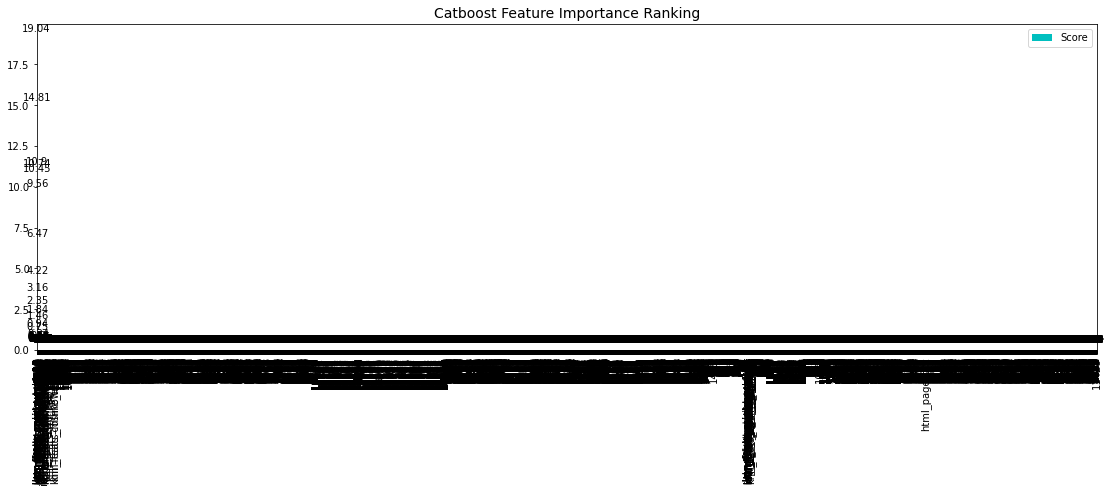

In [185]:
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, catboost_model.get_feature_importance(Pool(X_train, label=Y_train, cat_features=cat_features)))), columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (19, 6)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
rects = ax.patches
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [0]:
catboost_train_pred = catboost_model.predict(X_train)
catboost_val_pred = catboost_model.predict(X_validation)
catboost_test_pred = catboost_model.predict(X_test)

In [0]:
catboost_train_pred = catboost_model.predict(X_train)
catboost_val_pred = catboost_model.predict(X_validation)
catboost_test_pred = catboost_model.predict(X_test)

In [201]:
catboost_test_pred

array([[2],
       [2],
       [2],
       ...,
       [0],
       [2],
       [0]])

In [0]:
subm = pd.read_csv('sample_submission.csv')

In [0]:
subm.target = pd.Series([i[0] for i in catboost_test_pred])

In [0]:
subm.to_csv('submition.csv', index=False)

In [181]:
subm

,id,target
0,071c2e15-5fd0-4e7d-b78d-26b7c34491e1,1
1,e534df73-b385-4a12-8368-38992d3af7d3,1
2,4e38c9ff-bffe-4251-b2b2-94777c7344fe,1
3,a7f8870c-30f8-4851-8f8b-4c16942b397f,2
4,c062f411-ae3e-486a-9cba-2267889adb2b,2
...,...,...
4371,f91cfa0f-5157-4164-ab81-74600fce132d,1
4372,9e7059e5-7fc5-42d9-ba12-9812aa0f8668,1
4373,3a6f84ca-f796-4b5d-8125-d4e285b65004,1
4374,bbff5d3d-634e-4db9-b134-3f86355089ce,1


In [202]:
pd.Series([i[0] for i in catboost_test_pred]).value_counts()

2    2826
0    1399
1     151
dtype: int64

In [259]:
print('Train:', weighted_acc(Y_train, [i[0] for i in catboost_train_pred]))
print('Validation:', weighted_acc(Y_validation, [i[0] for i in catboost_val_pred]))

Train: 0.9998647277646263
Validation: 0.9929347826086956


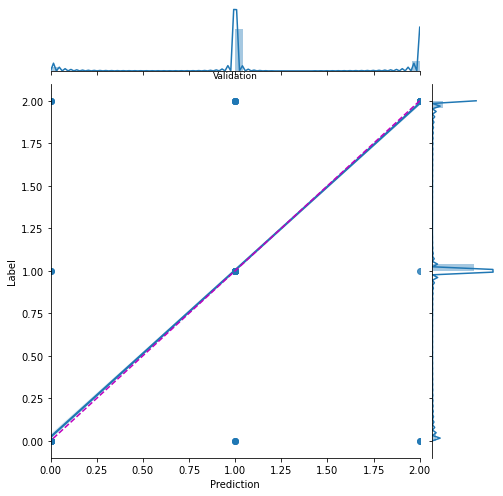

In [262]:
def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg", height=7)
    plt.plot([min_val, max_val], [min_val, max_val], 'm--')
    plt.title(title, fontsize=9)
    plt.show()
    
#model_performance_sc_plot(catboost_train_pred, Y_train, 'Train')
model_performance_sc_plot(catboost_val_pred, Y_validation, 'Validation')

### XGBoost

In [231]:

# Use only part of features on XGBoost.
# xgb_features = ['item_cnt','item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1', 
#                 'item_cnt_shifted2', 'item_cnt_shifted3', 'shop_mean', 
#                 'shop_item_mean', 'mean_item_cnt', 'item_trend']

# xgb_features= ['item_price', 'item_cnt', 'mean_item_cnt', 'transactions', 'year',
#        'month', 'item_price_unit', 'item_cnt_min', 'item_cnt_max',
#        'item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1',
#        'item_cnt_shifted2', 'item_cnt_shifted3', 'item_cnt_shifted4',
#        'item_cnt_shifted12', 'item_trend', 'subtype_code', 'shop_mean',
#        'item_mean', 'shop_item_mean', 'year_mean', 'month_mean']
                
xgb_train = X_train#[xgb_features]
xgb_val = X_validation#[xgb_features]
xgb_test = X_test#[xgb_features]

ERROR! Session/line number was not unique in database. History logging moved to new session 65


In [233]:
xgb_model = XGBClassifier(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3)
xgb_model.fit(xgb_train, 
              Y_train, 
              eval_set=[(xgb_train, Y_train), (xgb_val, Y_validation)], 
              verbose=20, 
              early_stopping_rounds=20)

ValueError: ignored

In [0]:
plt.rcParams["figure.figsize"] = (15, 6)
plot_importance(xgb_model)
plt.show()

In [0]:
xgb_train_pred = xgb_model.predict(xgb_train)
xgb_val_pred = xgb_model.predict(xgb_val)
xgb_test_pred = xgb_model.predict(xgb_test)

In [0]:
print('Train:', weighted_acc(Y_train, xgb_train_pred))
print('Validation:', weighted_acc(Y_validation, xgb_val_pred))

In [0]:
# model_performance_sc_plot(xgb_train_pred, Y_train, 'Train')
model_performance_sc_plot(xgb_val_pred, Y_validation, 'Validation')

### Random Forest

In [0]:
# Use only part of features on random forest.
# rf_features = ['shop_id', 'item_id', 'item_cnt', 'transactions', 'year',
#                'item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1', 
#                'shop_mean', 'item_mean', 'mean_item_cnt', 'item_trend']

rf_train = X_train#[rf_features]
rf_val = X_validation#[rf_features]
rf_test = X_test#[rf_features]

In [0]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=7,n_jobs=-1)
rf_model.fit(rf_train, Y_train)

In [0]:
rf_train_pred = rf_model.predict(rf_train)
rf_val_pred = rf_model.predict(rf_val)
rf_test_pred = rf_model.predict(rf_test)

In [0]:
rint('Train:', weighted_acc(Y_train, rf_train_pred))
print('Validation:', weighted_acc(Y_validation, rf_val_pred))

In [0]:
# model_performance_sc_plot(rf_train_pred, Y_train, 'Train')
model_performance_sc_plot(rf_val_pred, Y_validation, 'Validation')

### Logostic Regression

In [0]:
# Use only part of features on linear Regression.
# add item_trend
# lr_features = ['item_cnt', 'item_cnt_shifted1', 'mean_item_cnt', 'shop_mean']#, 'item_cnt_shifted2', 'item_cnt_shifted12', 'item_trend', 'shop_item_mean', 'month_mean']

lr_train = X_train#[lr_features]
lr_val = X_validation#[lr_features]
lr_test = X_test#[lr_features]

In [0]:
lr_scaler = MinMaxScaler()
lr_scaler.fit(lr_train)
lr_train = lr_scaler.transform(lr_train)
lr_val = lr_scaler.transform(lr_val)
lr_test = lr_scaler.transform(lr_test)

In [0]:
lr_model = LogisticRegression(n_jobs=-1)
lr_model.fit(lr_train, Y_train)

In [0]:
lr_train_pred = lr_model.predict(lr_train)
lr_val_pred = lr_model.predict(lr_val)
lr_test_pred = lr_model.predict(lr_test)

In [0]:
print('Train:', weighted_acc(Y_train, lr_train_pred))
print('Validation:', weighted_acc(Y_validation, lr_val_pred))

In [0]:
# model_performance_sc_plot(lr_train_pred, Y_train, 'Train')
model_performance_sc_plot(lr_val_pred, Y_validation, 'Validation')

### KNN clf

In [0]:
# Use only part of features on KNN.
# knn_features = ['item_cnt', 'item_cnt_mean', 'item_cnt_std', 'item_cnt_shifted1',
#                 'item_cnt_shifted2', 'shop_mean', 'shop_item_mean', 'mean_item_cnt']

# Subsample train set (using the whole data was taking too long).
X_train_sampled = X_train[:100000]
Y_train_sampled = Y_train[:100000]

knn_train = X_train_sampled[knn_features]
knn_val = X_validation[knn_features]
knn_test = X_test[knn_features]

In [0]:
knn_scaler = MinMaxScaler()
knn_scaler.fit(knn_train)
knn_train = knn_scaler.transform(knn_train)
knn_val = knn_scaler.transform(knn_val)
knn_test = knn_scaler.transform(knn_test)

In [0]:
knn_model = KNeighborsClassifier(n_neighbors=3, leaf_size=13, n_jobs=-1, )
knn_model.fit(knn_train, Y_train_sampled)

In [0]:
knn_train_pred = knn_model.predict(knn_train)
knn_val_pred = knn_model.predict(knn_val)
knn_test_pred = knn_model.predict(knn_test)

In [0]:
print('Train:', weighted_acc(Y_train_sampled, knn_train_pred))
print('Validation:', weighted_acc(Y_validation, knn_val_pred))

In [0]:
# model_performance_sc_plot(knn_train_pred, Y_train_sampled, 'Train')
model_performance_sc_plot(knn_val_pred, Y_validation, 'Validation')

### Stack first level

In [0]:
# Dataset that will be the train set of the ensemble model.
first_level = pd.DataFrame(catboost_val_pred, columns=['catboost'])
first_level['xgbm'] = xgb_val_pred
first_level['random_forest'] = rf_val_pred
first_level['linear_regression'] = lr_val_pred
first_level['knn'] = knn_val_pred
first_level['label'] = Y_validation.values
first_level.head()

In [0]:
# Dataset that will be the test set of the ensemble model.
first_level_test = pd.DataFrame(catboost_test_pred, columns=['catboost'])
first_level_test['xgbm'] = xgb_test_pred
first_level_test['random_forest'] = rf_test_pred
first_level_test['linear_regression'] = lr_test_pred
first_level_test['knn'] = knn_test_pred
first_level_test.head()

## Second level

In [0]:
meta_model = LinearRegression(n_jobs=-1)

In [0]:
# Drop label from dataset.
first_level.drop('label', axis=1, inplace=True)
meta_model.fit(first_level, Y_validation)

In [0]:
# Make predictions on test set using the 1st level models predictions as features
ensemble_pred = meta_model.predict(first_level)
final_predictions = meta_model.predict(first_level_test)

In [0]:
# Ensemble model metrics on validation set
print('Train rmse:', np.sqrt(mean_squared_error(ensemble_pred, Y_validation)))

In [0]:
model_performance_sc_plot(ensemble_pred, Y_validation, 'Validation')

# Output

In [0]:
prediction_df = pd.DataFrame(test_df['ID'], columns=['ID'])
prediction_df['item_cnt_month'] = final_predictions.clip(0., 20.)
prediction_df.to_csv('submission.csv', index=False)
prediction_df.head(10)